In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 입력 신호 생성 ---
f_s = 1000       # 샘플링 주파수 (Hz)
t_end = 1        # 신호 지속 시간 (초)
N = f_s * t_end  # 샘플 개수 (1000개)

# 주파수 및 진폭 설정
f1 = 50          # 50 Hz 성분
f2 = 120         # 120 Hz 성분
A1 = 0.7         # 50 Hz 진폭
A2 = 1.0         # 120 Hz 진폭

# 시간 벡터 생성
t = np.linspace(0, t_end, N, endpoint=False)

# 신호 x(t) 생성
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

# --- 2. FFT 수행 ---
X = np.fft.fft(x)
print(type(X))
# print(X)



<class 'numpy.ndarray'>


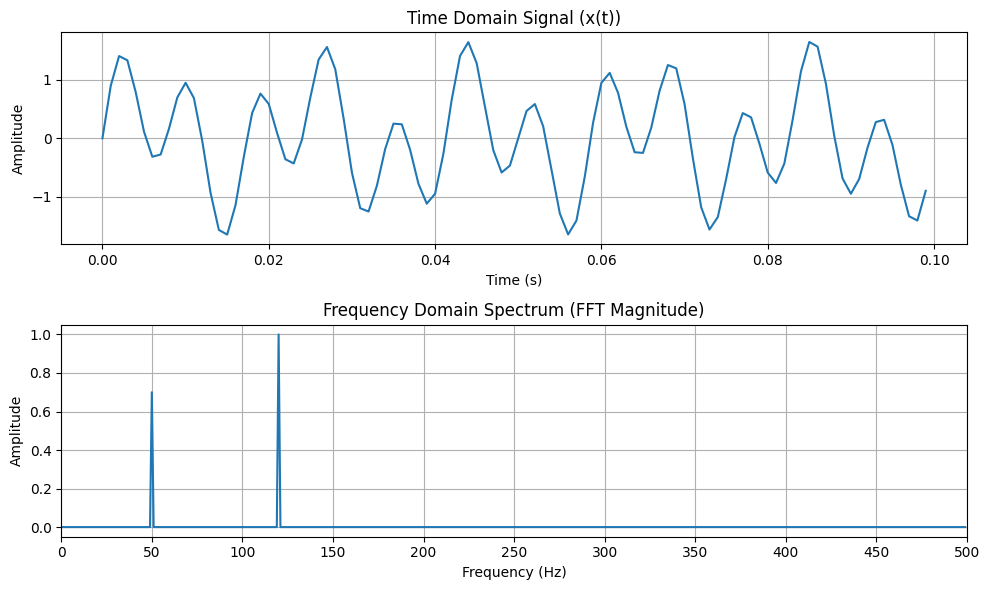

In [18]:
# --- 3. 주파수 축 생성 및 결과 해석 ---

# FFT 결과의 주파수 축 생성
f = np.fft.fftfreq(N, 1/f_s)

# 진폭 스펙트럼 계산 (|X|)
X_abs = np.abs(X)

# 양의 주파수 영역만 선택 (0 Hz 부터 나이퀴스트 주파수까지)
# FFT 결과는 대칭이므로 절반만 사용합니다.
N_half = N // 2
f_one_sided = f[:N_half]
X_one_sided = X_abs[:N_half]

# 진폭 보정: DC 성분(0 Hz)을 제외하고, N/2를 곱하는 대신 2/N을 곱하여 원래의 신호 진폭을 복원합니다.
# (DC 성분은 N으로 나누어야 합니다. 여기서는 편의상 전체에 2/N을 곱하여 주요 주파수 성분을 확인합니다.)
amplitude_spectrum = 2 / N * X_one_sided

# --- 4. 시각화 ---
plt.figure(figsize=(10, 6))

# 시간 영역 신호 플롯
plt.subplot(2, 1, 1)
plt.plot(t[:100], x[:100]) # 처음 100개의 샘플만 플롯하여 가독성 향상
plt.title('Time Domain Signal (x(t))')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# 주파수 영역 스펙트럼 플롯
plt.subplot(2, 1, 2)
plt.plot(f_one_sided, amplitude_spectrum)
plt.title('Frequency Domain Spectrum (FFT Magnitude)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, f_s/2 + 10, 50)) # X축 눈금 설정
plt.xlim(0, f_s/2) # 플롯 범위를 나이퀴스트 주파수까지로 제한
plt.grid(True)

plt.tight_layout()
plt.show()
